# Investment

This script allows to quickly determine for a given head H and volume flow rate Q, how much yearly intake can be expected and if the net present value would be positive.

## Imports and constants

In [17]:
import math
import numpy as np
from matplotlib import pyplot as plt

g = 9.81 # Gravitational acceleration 9.81 m.s-2
rho = 999 # Density of water at 15 deg Celsius in kg.m-3
PI = math.pi # PI
C_W_to_kW = 1000 # Conversion factor in W.kW-1

values = {}
values[ "g" ] = { "value" : g , "unit" : "m.s-2" , "literal" : "Gravitational acceleration (g)" , "type" : "constant" }
values[ "rho" ] = { "value" : rho , "unit" : "kg.m-3" , "literal" : "Density of water (rho)" , "type" : "constant" }

## Nominal electric power, yearly amount of energy, yearly intake

### Assumptions

Calculating the expected yearly intake *YI* and nominal electric power *P_el* from hydraulic and boundary parameters:

- Head *H* in m
- Volumetric flow rate *Q* in m3.s-1
- Effective efficiency of the whole plant *eta_eff* in dimensionless
- Turbine efficiency *eta_T* in dimensionless
- Generator efficiency *eta_G* in dimensionless
- Transformator efficiency *eta_Tr* in dimensionless
- electricity price *EP* in €.kWh-1
- Annual full load hours *FLH* in h.a-1
- Nominal electric power *P_el* in kW
- Yearly total amount of generated energy in kw.h-1

In [18]:
# Please enter your hydraulic characteristics here:
H     = 4.6 # Head in m
Q     = 1.090 # Volumetric flow rate in m3.s-1

# Use default value for eta eff 
#eta_eff = 0.6 # in dimensionless

# Calculate effective efficiency from turbine, generator and transformator effiency
eta_T = 0.9   # values between 0.8 and 0.9 occur
eta_G = 0.95  # value between 0.95 and 0.99 occur 
eta_Tr = 0.85 # values between 0.78 and 0.92 occur
eta_eff = eta_T * eta_G * eta_Tr

EP    = 0.09 # in €.kWh-1
FLH   = 4500 # in h.a-1

P_el = rho * g * H * Q * eta_eff / C_W_to_kW
E_el= P_el * FLH
YI = E_el * EP


print( "The effective efficiency is: " , eta_eff )
print( "The expected nominal power is: " , P_el , "kW" )
print( "The expected total yearly electrical energy generated is: " , E_el , "kWh/a" )
print( "The expected yearly intake is: " , YI , "€" )

values[ "H" ] = { "value" : H , "unit" : "m" , "literal" : "Head (H)" , "type" : "input parameter" }
values[ "Q" ] = { "value" : Q , "unit" : "m3.s-1" , "literal" : "Volume flow rate (Q)" , "type" : "input parameter" }
values[ "eta_eff" ] = { "value" : eta_eff , "unit" : "dimensionless" , "literal" : "Effective efficiency (eta_eff)" , "type" : "input parameter" }
values[ "eta_T" ] = { "value" : eta_T , "unit" : "dimensionless" , "literal" : "Turbine efficiency (eta_T)" , "type" : "input parameter" }
values[ "eta_G" ] = { "value" : eta_G , "unit" : "dimensionless" , "literal" : "Generator efficiency (eta_G)" , "type" : "input parameter" }
values[ "eta_Tr" ] = { "value" : eta_Tr , "unit" : "dimensionless" , "literal" : "Transformator efficiency (eta_Tr)" , "type" : "input parameter" }
values[ "EP" ] = { "value" : EP , "unit" : "€.kWh-1" , "literal" : "Enery Price (EP)" , "type" : "input parameter" }
values[ "FLH" ] = { "value" : FLH , "unit" : "h.a-1" , "literal" : "Full Load Hours (FLH)" , "type" : "input parameter" }
values[ "P_el" ] = { "value" : P_el , "unit" : "kW" , "literal" : "Nominal electrical power (P_el)" , "type" : "calculated value" }
values[ "E_el" ] = { "value" : E_el , "unit" : "kWh/a" , "literal" : "Total electricity generated per year (E_el)" , "type" : "calculated value" }
values[ "YI" ] = { "value" : YI , "unit" : "€/a" , "literal" : "Yearly intake (YI)" , "type" : "calculated value" }

The effective efficiency is:  0.72675
The expected nominal power is:  35.711152445655 kW
The expected total yearly electrical energy generated is:  160700.18600544753 kWh/a
The expected yearly intake is:  14463.016740490277 €


## Calculate Net Present Value of the investment

Calculate the net present value (*NPV*)

- The relative capital expenditure (CAPEX) cost *CAPEX* in €.kW-1
- The yearly intake *YI* in €
- Interest rate *r* dimensionless     

In [ ]:
# Definition of inputs

# Use constant values below if applicable 
#I = 300000 # Total invest at time t = 0 in €
#CAPEX = I / P_el
#YI = 50000 # Yearly intake in €/a

# Use specific investment costs
CAPEX = 8000
I = P_el * CAPEX # Total capital expenditure

S_Invest_Energy = I / E_el

r = 0.05 # Interest rate in percent
T = 15 # Number of years to be considered
OAM = 0.01 # Maintenance cost in percent of the total invest

# Initialise variables
cashflows = [ YI - I * OAM ] * T
sum = 0
t = 0

# Calculating the sum of cashflows
for cf in cashflows:
    t = t + 1
    sum += float( cf ) / ( 1 + r ) ** t

NPV = sum - I
    
values[ "S_Invest_Energy" ] = { "value" : S_Invest_Energy , "unit" : "€.kWh-1" , "literal" : "Specific invest per amount of energy" , "type" : "calculated value" }
values[ "CAPEX" ] = { "value" : CAPEX , "unit" : "€.kW-1" , "literal" : "Specific capital expenditure (CAPEX)" , "type" : "input parameter" }
values[ "I" ] = { "value" : I , "unit" : "€" , "literal" : "Total capital expenditure (I)" , "type" : "calculated value" }
values[ "r" ] = { "value" : r , "unit" : "dimensionless" , "literal" : "Interest rate (r)" , "type" : "input parameter" }
values[ "T" ] = { "value" : T , "unit" : "years" , "literal" : "Number of years (T)" , "type" : "input parameter" }
values[ "OAM" ] = { "value" : OAM , "unit" : "dimensionless" , "literal" : "Specific cost for operation and maintenance as percent of the total CAPEX (OAM)" , "type" : "input parameter" }
values[ "cashflow" ] = { "value" : cashflows[ 0 ] , "unit" : "€.y-1" , "literal" : "Yearly constant cashflows (cashflows[0])" , "type" : "calculated value" }
values[ "NPV" ] = { "value" : NPV , "unit" : "€" , "literal" : "Net present value (NPV)" , "type" : "calculated value" }

print( "+++   +++   +++   +++   +++   +++   +++   \n\n" )
print( "Constants:" )
for key in values:
    if values[ key ][ "type" ] == "constant":
        print( values[ key ][ "value" ] , " in " , values[ key ][ "unit" ] , " " , values[ key ][ "literal" ] )
        
print( "\nInput parameter:" )
for key in values:    
    if values[ key ][ "type" ] == "input parameter":
        print( values[ key ][ "value" ] , " in " , values[ key ][ "unit" ] , " " , values[ key ][ "literal" ] )
        
print( "\nResults:" )
for key in values:
    if values[ key ][ "type" ] == "calculated value":
        print( values[ key ][ "value" ] , " in " , values[ key ][ "unit" ] , " " , values[ key ][ "literal" ] )

print()
if NPV >= 0:
    print( "NPV is positive, your invest is likely to be lucrative" )
if NPV < 0:
    print( "NPV is negative, your invest is likely to fail" )

## Overview on expected yearly intake for different Head H and volume flow rate Q

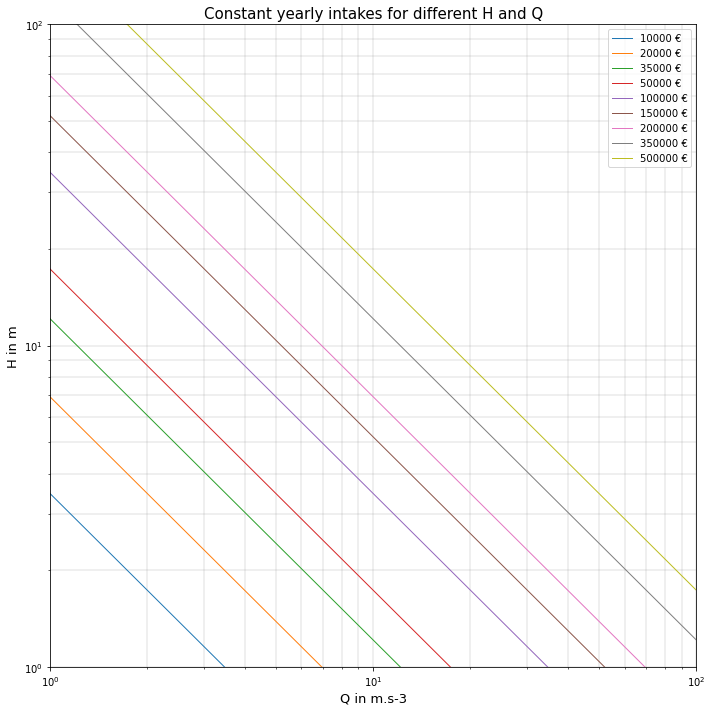

In [19]:
# Calculate constant yearly intakes
# Preparing the data for the plot
YI_span = [ 10000 ,
       20000 ,
       35000 ,
       50000 ,
       100000 ,
       150000 ,
       200000 ,
       350000 ,
       500000 ]

ALL_Q = np.arange( 0.001 , 100.0 , 0.1 )

ALL_H = [ ]
for yi in YI_span:
    H = []
    for q in ALL_Q:
        H.append( yi / rho / g / eta_eff * C_W_to_kW / EP / FLH / q )
    ALL_H.append( ( yi , H ) )


# Creating figure and axes
fig, ( ax2 ) = plt.subplots( 1 , 1, figsize=[10, 10])

# Plotting the graph with Log ticks at x and y axis using loglog
for tpl in ALL_H:
    ax2.loglog( ALL_Q , tpl[ 1 ] , '-' , linewidth = 1 , label = str( tpl[ 0 ] ) + ' €')
ax2.set_title( 'Constant yearly intakes for different H and Q' , fontsize = 15 )

#ax2.loglog( Q , H , '-' , linewidth = 10 , label = 'Your site')

plt.grid( visible = True , which = 'both' , color = 'grey', ls = '-' , lw = 0.25 )

ax2.set_xlabel( 'Q in m.s-3' , fontsize = 13 )
ax2.set_ylabel( 'H in m' , fontsize = 13 )

ax2.set_xlim( 1 , 100 )
ax2.set_ylim( 1 , 100 )

ax2.legend()

plt.tight_layout()
plt.show()

# Analysis of NPV over CAPEX

For given

- r - interest rate
- T - Periods in years

when is the NPV positive?

In [ ]:
# Assuming a constant P_el
P_el = 50 # in kW

# Constant economic parameter 
r = 0.05 # Interest rate in percent
T = 20 # Number of years to be considered
OAM = 0.02 # Maintenance cost in percent of the total invest
EP    = 0.12 # in €.kWh-1
FLH   = 4500 # in h.a-1

# Calculate constant yearly intake from given parameter
YI = P_el * FLH * EP
    
# A range of CAPEX
range_CAPEX = np.arange( 2000 , 12000 , 100 )
res_NPV = []

# Calculate all NPVs for different CAPEX
for CAPEX in range_CAPEX:
    # Calculate total absolute capital expenditure
    I = P_el * CAPEX
    
    # Initialise variables
    cashflows = [ YI - I * OAM ] * T
    sum = 0
    t = 0

    # Calculating the sum of cashflows
    for cf in cashflows:
        t = t + 1
        sum += float( cf ) / ( 1 + r ) ** t

    NPV = sum - I
    
    res_NPV.append( NPV )

# Plot results in graph

fig , ax = plt.subplots()

ax.plot( range_CAPEX , res_NPV , linewidth = 2.0 , label = str( P_el ) + "kW" )

plt.grid( visible = True , which = 'both' , color = 'grey', ls = '-' , lw = 0.25 )

ax.set_title( 'Net Present Value NPV as a function of CAPEX' , fontsize = 15 )
ax.set_xlabel( "CAPEX in €/kW" )
ax.set_ylabel( "NPV in €" )
ax.legend()

plt.show()

In [21]:
# Need for a contour plot
# https://www.tutorialspoint.com/matplotlib/matplotlib_contour_plot.htm
#https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html 


import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


#delta = 0.025
#x = np.arange(-3.0, 3.0, delta)
q = np.arange( 0.001 , 100.0 , 1 )

#y = np.arange(-2.0, 2.0, delta)
h = np.arange( 1 , 100.0 , 1 )

# Meshgrid
Q, H = np.meshgrid( q , h )

# Constant economic parameter 
r = 0.05 # Interest rate in percent
T = 20 # Number of years to be considered
OAM = 0.02 # Maintenance cost in percent of the total invest
EP    = 0.12 # in €.kWh-1
FLH   = 4500 # in h.a-1

print( Q.ndim )
print( Q.size )
print( Q.shape )
print( Q.dtype )
print( type( Q ) )
print( Q[0][0] )
print( H[0][0] )



2
9900
(99, 100)
float64
<class 'numpy.ndarray'>
0.001
1.0


(0.0, 100.0)

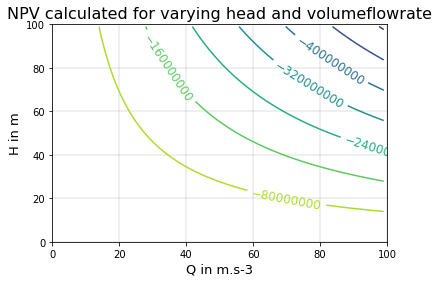

In [28]:
# Need for a contour plot
# https://www.tutorialspoint.com/matplotlib/matplotlib_contour_plot.htm
#https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html 


import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Ranges
Q = np.arange( 0.001 , 100.0 , 1 )
H = np.arange( 1 , 100.0 , 1 )

# Constant economic parameter 
r = 0.05 # Interest rate in percent
T = 20 # Number of years to be considered
OAM = 0.02 # Maintenance cost in percent of the total invest
EP    = 0.12 # in €.kWh-1
FLH   = 4500 # in h.a-1

def calculate_net_present_value_for_hydro( rho , g , h , q , eta_eff , C_W_to_kW , FLH , EP , CAPEX , OAM , T , r ):
    """
    Calculate for a given head and volume flow rate and economic parameters the net present value
    """
    # Electric power
    P_el = rho * g * h * q * eta_eff / C_W_to_kW
    
    # Calculate constant yearly intake from given parameter
    YI = P_el * FLH * EP
    
    # Calculate total absolute capital expenditure
    I = P_el * CAPEX
    
    # Initialise variable
    cashflows = [ YI - I * OAM ] * T
    
    sum = 0
    t = 0

    # Calculating the sum of cashflows
    for cf in cashflows:
        t = t + 1
        sum += float( cf ) / ( 1 + r ) ** t
    NPV = sum - I
    return NPV


# Calculate NPV values
NPV = np.zeros( [ len( H ) , len( Q ) ] )

i = 0
j = 0

for i in range( 0 , len( H ) , 1 ) :
    for j in range( 0 , len( Q ) , 1 ):
        NPV[ i ][ j ] = calculate_net_present_value_for_hydro( rho , g , H[ i ] , Q[ j ] , eta_eff , C_W_to_kW , FLH , EP , CAPEX , OAM , T , r )

fig, ax = plt.subplots()
#CS = ax.contour( Q , H , NPV , levels=[-10000, 0, 10000])
CS = ax.contour( Q , H , NPV )
ax.clabel( CS , inline = True , fontsize = 12)
plt.grid( visible = True , which = 'both' , color = 'grey', ls = '-' , lw = 0.25 )
ax.set_title('NPV calculated for varying head and volumeflowrate' , fontsize = 16 )
ax.set_xlabel( 'Q in m.s-3' , fontsize = 13 )
ax.set_ylabel( 'H in m' , fontsize = 13 )
ax.set_xlim( 0 , 100 )
ax.set_ylim( 0 , 100 )